# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [20]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

In [21]:
# Inspect the shapes of the datasets
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f"Before one-hot encoding: {y_train[0]}, {y_train[1]}, {y_train[3]}")
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)
print(f"After one-hot encoding: {y_train_onehot[0]}, {y_train_onehot[1]}, {y_train_onehot[3]}")

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)
Before one-hot encoding: 9, 0, 3
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


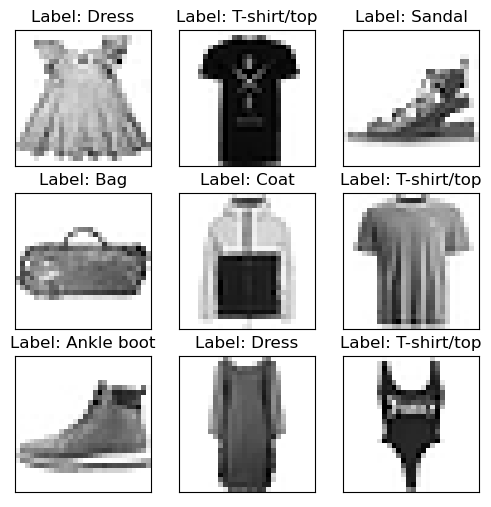

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

> Data looks as expected.
> 
> Quality of the images is pretty bad - they have low resolution and are greyscale. 
>
> One issue I noticed is that some items of clothing from different categories look very similar.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Create a simple linear regression model
model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes))

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)
model.fit(
    X_train,
    y_train_onehot,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)
loss, accuracy = model.evaluate(X_test, y_test_onehot)

print(f"Loss:     {loss:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1967 - loss: 9.4297 - val_accuracy: 0.2542 - val_loss: 8.0929
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2675 - loss: 10.1495 - val_accuracy: 0.2668 - val_loss: 10.7967
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2710 - loss: 9.9814 - val_accuracy: 0.2797 - val_loss: 9.5031
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2779 - loss: 9.4604 - val_accuracy: 0.2373 - val_loss: 10.0922
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2472 - loss: 9.6448 - val_accuracy: 0.2754 - val_loss: 9.6773
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2790 - loss: 9.5230
Loss:     9.56
Accuracy: 27.62%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

> The performance of the baseline model is 27.6%.
>
> I want it to be 100%, but I know that's unrealistic for such a simple mode.
>
> The performance is at this level, because there's no linear relationship betweel image vectors and their categories.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [40]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
def create_model(filters):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation="softmax"))
    return model

def compile_fit_evaluate(mdl):
    # Train the model
    model.compile(
        loss="categorical_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"],
    )
    model.fit(
        X_train,
        y_train_onehot,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test_onehot)
    return loss, accuracy


model = create_model(filters=32)
loss, accuracy = compile_fit_evaluate(mdl=model)
print(f"Loss:     {loss:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")

/home/artem/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8047 - loss: 0.5541 - val_accuracy: 0.8767 - val_loss: 0.3400
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8937 - loss: 0.2936 - val_accuracy: 0.8899 - val_loss: 0.3102
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9111 - loss: 0.2540 - val_accuracy: 0.8933 - val_loss: 0.2963
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9216 - loss: 0.2198 - val_accuracy: 0.8987 - val_loss: 0.2925
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9298 - loss: 0.1961 - val_accuracy: 0.9000 - val_loss: 0.2893
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8971 - loss: 0.2986
Loss:     0.30
Accuracy: 89.43%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

> CNN model performed better than the baseline model by around 60%.
>
> Complexity of the CNN model and its ability to learn complex patterns contributes to this improvement.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
tunning_results = []
for filters_num in [1, 32, 64, 128]:
    _, accuracy = compile_fit_evaluate(create_model(filters=filters_num))
    print(f"Filters: {filters_num},    Accuracy: {accuracy*100:.2f}%")
    tunning_results.append((filters_num, accuracy))

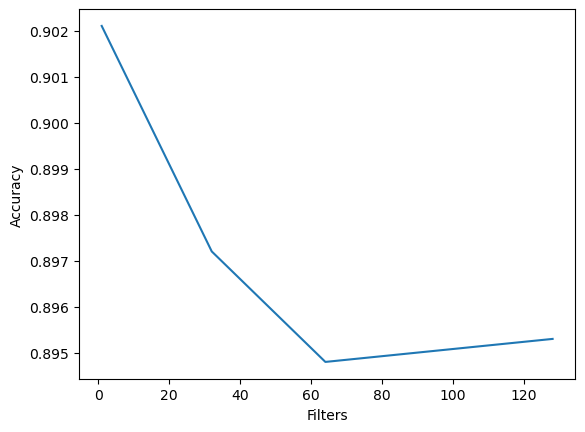

In [44]:
# Plot the results
x_coords, y_coords = zip(*tunning_results)
# Create the scatter plot
plt.plot(x_coords, y_coords)

# Add labels and title for clarity
plt.xlabel("Filters")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [48]:
# B. Test presence or absence of regularization
from tensorflow.keras import regularizers

loss1, accuracy1 = compile_fit_evaluate(create_model(filters=32))

model = Sequential()
model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
        kernel_regularizer=regularizers.l2(0.1),
    )
)
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))
loss2, accuracy2 = compile_fit_evaluate(model)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9263 - loss: 0.2057 - val_accuracy: 0.9028 - val_loss: 0.2968
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9358 - loss: 0.1898 - val_accuracy: 0.8988 - val_loss: 0.3077
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9426 - loss: 0.1715 - val_accuracy: 0.8947 - val_loss: 0.3174
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9451 - loss: 0.1619 - val_accuracy: 0.9053 - val_loss: 0.3037
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9513 - loss: 0.1503 - val_accuracy: 0.9021 - val_loss: 0.3211
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8931 - loss: 0.3438
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7959 - loss: 0.6714 - val_accuracy: 0.8649 - val_loss: 0.4205
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8698 - loss: 0.4024 - val_accuracy: 0.8814 - val_loss: 0.3779
Epoch 3/5
1500/1500 ━

In [49]:
print(f"Loss without regularization:     {loss1:.2f}")
print(f"Accuracy without regularization: {accuracy1*100:.2f}%")

print(f"Loss with regularization:     {loss2:.2f}")
print(f"Accuracy with regularization: {accuracy2*100:.2f}%")

Loss without regularization:     0.34
Accuracy without regularization: 89.25%
Loss with regularization:     0.36
Accuracy with regularization: 88.47%


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

> Did any of the changes you made improve the model's performance? If so, which ones?
>
> Using 1 filter made accuracy slightly better.

> What do you think contributed to these improvements?
>
> No idea, what the "filters" in Conv2D are, but making it 1 made accuracy a bit better.

> Finally, what combination of hyperparameters and regularization techniques yielded the best performance?
>
> I think using 1 filter without regularization would yield the best performance.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [51]:
model = Sequential()
model.add(
    Conv2D(
        1,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
    )
)
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))
loss2, accuracy2 = compile_fit_evaluate(model)
print(f"Loss:     {loss:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7124 - loss: 0.8396 - val_accuracy: 0.8121 - val_loss: 0.5343
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8308 - loss: 0.4922 - val_accuracy: 0.8339 - val_loss: 0.4781
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8377 - loss: 0.4659 - val_accuracy: 0.8388 - val_loss: 0.4703
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8456 - loss: 0.4518 - val_accuracy: 0.8408 - val_loss: 0.4582
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8434 - loss: 0.4530 - val_accuracy: 0.8347 - val_loss: 0.4728
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290 - loss: 0.4922
Loss:     0.30
Accuracy: 89.53%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

> How does the final model's performance compare to the baseline and the CNN model?
>
> The final model's performance is better than the baseline model performance and is about the same as CNN model performance.

> What do you think contributed to the final model's performance?
>
> Good selection of hyperparameters.

> If you had time, what other experiments would you run to further improve the model's performance?
> 
> I would try tunning other hyperparameters besides "filters".

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.